In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
path = "D:\Projects\IMDb Sentiment Analysis\data\IMDB Dataset.csv"

In [3]:
dataset = pd.read_csv(path)

In [4]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
X = dataset["review"]
y = dataset["sentiment"]

In [6]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))

In [7]:
X.describe()

count                                                 50000
unique                                                49582
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

In [8]:
lengths = []
for i in range(0, len(X)-1):
    lengths.append(len(X[i].split(' ')))

Text(0.5, 1.0, 'Lengths')

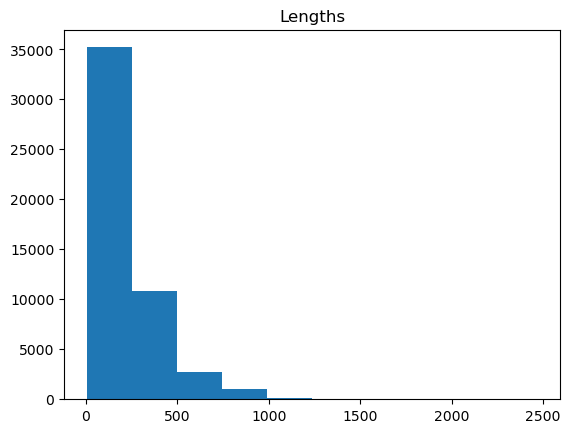

In [9]:
plt.hist(lengths)
plt.title("Lengths")

In [10]:
pip install nltk

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(clean_text)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)
model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train_vec,y_train)

c:\Users\Teba\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=200, solver='liblinear')

In [14]:
y_pred=model.predict(X_test_vec)


In [15]:
print(pd.DataFrame(y_pred))

      0
0     1
1     0
2     1
3     1
4     1
...  ..
9995  0
9996  0
9997  1
9998  0
9999  0

[10000 rows x 1 columns]


In [16]:
y_test

,0
11841,1
19602,0
45519,0
25747,1
42642,1
...,...
25091,0
27853,0
47278,1
37020,1


In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("F1 Score:", f1)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8858
F1 Score: 0.8857999999999999
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5035
           1       0.88      0.89      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:

[[4429  606]
 [ 536 4429]]


In [18]:
import joblib
joblib.dump(model, "../models/sentiment_model.pkl")
joblib.dump(vectorizer, "../models/vectorizer.pkl")

['../models/vectorizer.pkl']